In [1]:
import sys
sys.path.append('../../')
from localconfig import BASE_PATH,EXPS

import pathlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
np.set_printoptions(threshold=1050)
from pprint import pprint

import maxone_code.data
import maxone_code.fig
from maxone_code.data import Experiment
from maxone_code.artifact.checkfilter import CheckFilter

In [2]:
EXP,FILE=(EXPS[3],'Trace_20190918_15_54_18.raw.h5')
path=pathlib.Path(BASE_PATH).joinpath('data',EXP,'raw',FILE)
save_dir=pathlib.Path(BASE_PATH).joinpath('data',EXP,'artifact_removal')
path_cache_data=save_dir.joinpath('data_raw.npy')

In [3]:
assay=CheckFilter(path)

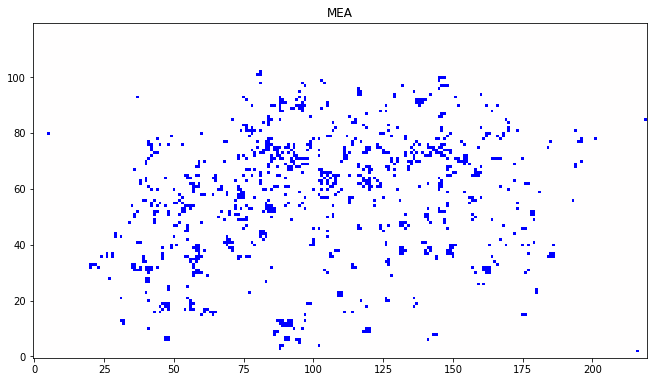

In [4]:
assay.disp_mea()

In [5]:
# assay.disp_mea_local(figsize=(50,50))

In [6]:
assay.loaddata(frame_slice=np.s_[20000:20000*2])

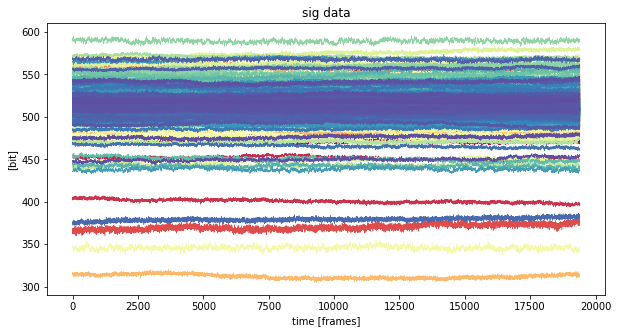

In [7]:
assay.disp_raw()

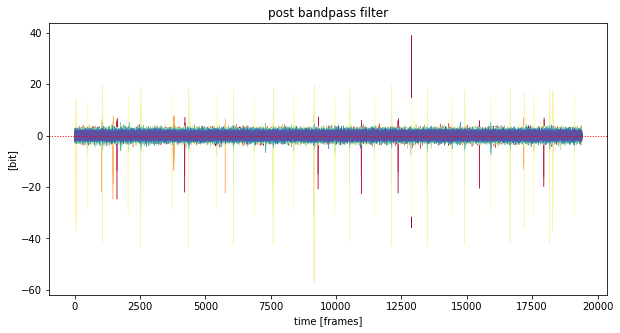

In [8]:
assay.disp_filtered()

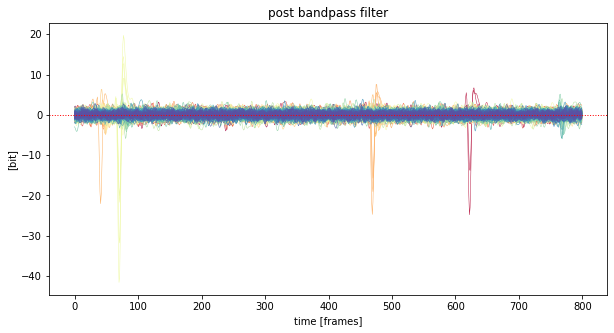

In [9]:
assay.disp_filtered(frange=np.s_[1000:1800])

In [10]:
from maxone_code.spikedetect import BandPassFilter,HighPassFilter

bpfs = {
    'BPF1000': BandPassFilter(lowcut=250, highcut=1000, order=4),
    'BPF2000': BandPassFilter(lowcut=250, highcut=2000, order=4),
    'BPF3000': BandPassFilter(lowcut=250, highcut=3000, order=4),
    'BPF4000': BandPassFilter(lowcut=250, highcut=4000, order=4),
    'BPF5000': BandPassFilter(lowcut=250, highcut=5000, order=4),
    'BPF7500': BandPassFilter(lowcut=250, highcut=7500, order=4),
    'BPF9000': BandPassFilter(lowcut=250, highcut=9000, order=4),
    'HPF': HighPassFilter(lowcut=250,order=4),
    }

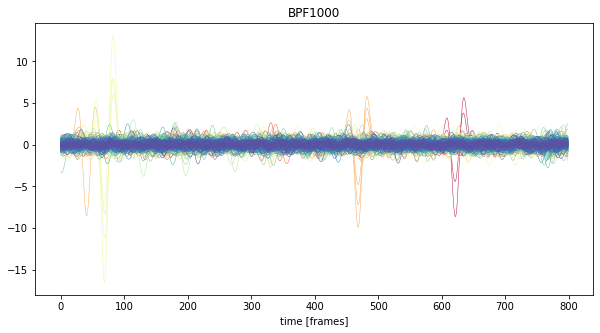

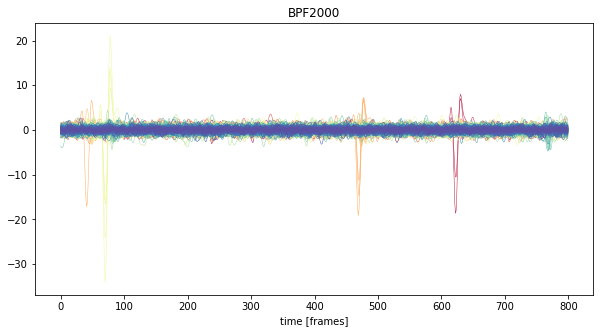

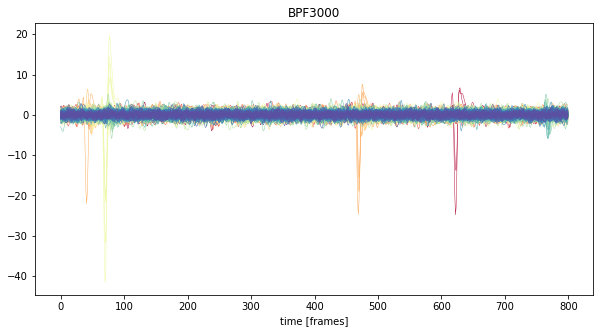

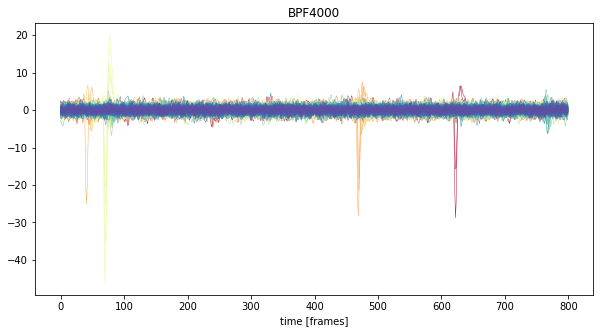

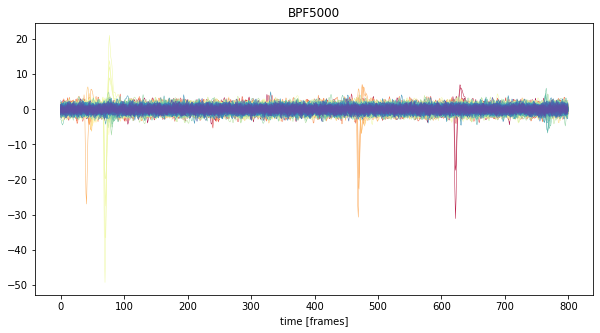

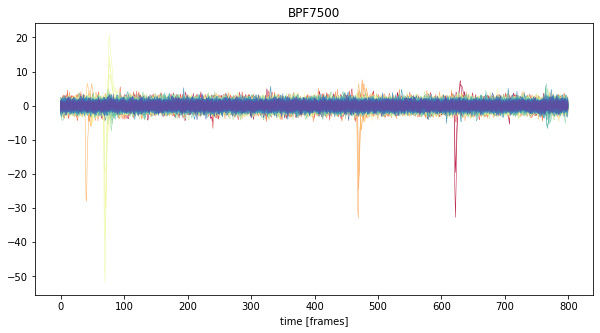

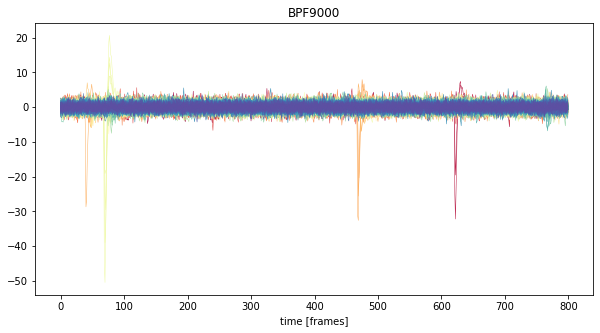

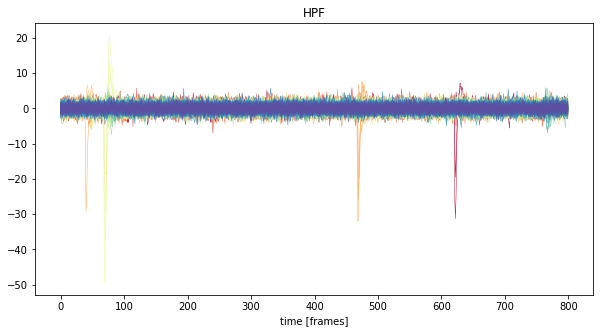

In [11]:
for name,bpf in bpfs.items():
    filtered = assay.filterProccessing(bpf,assay.data_raw_m, False)
    assay.disp_data(filtered,frange=np.s_[1000:1800],title=name)

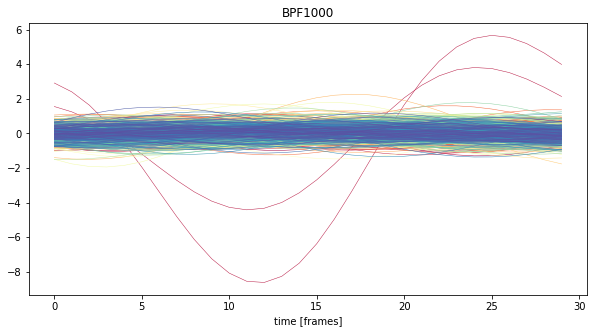

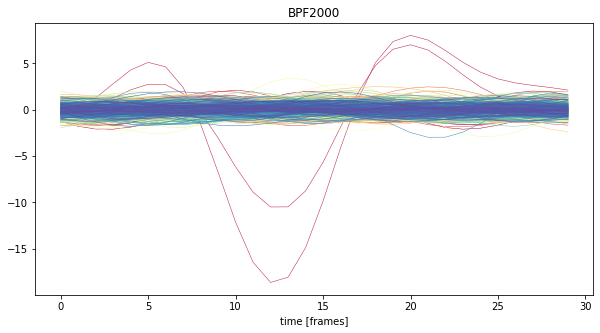

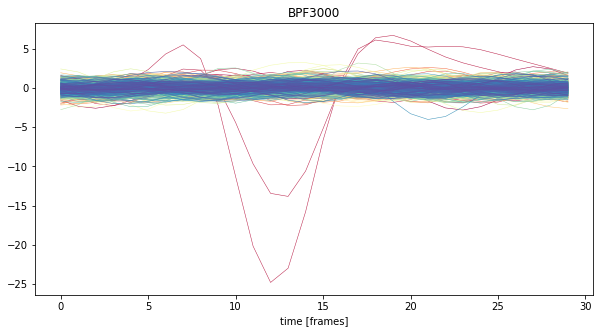

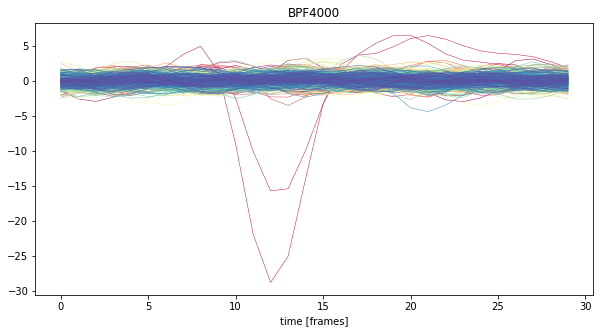

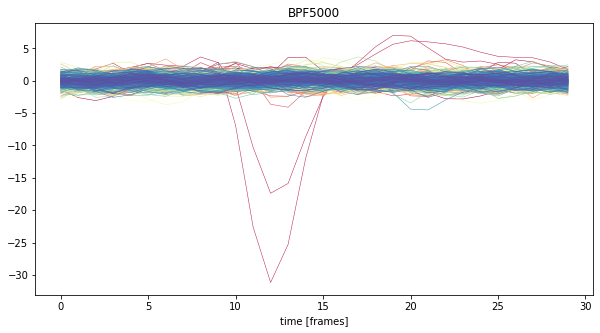

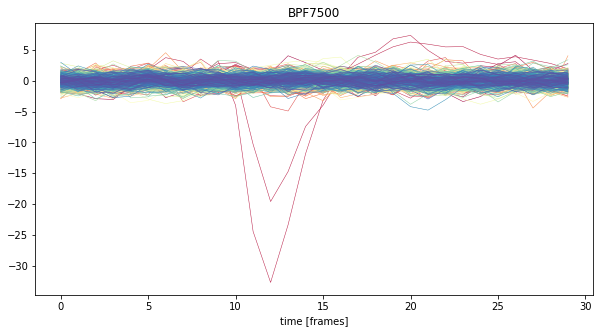

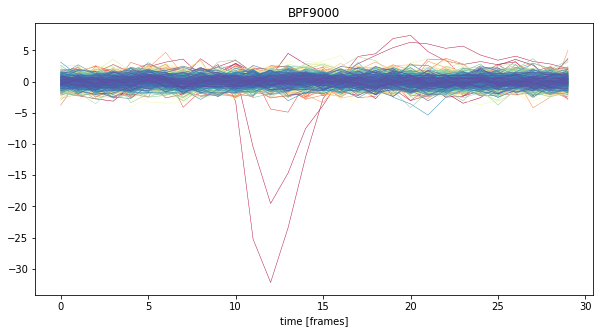

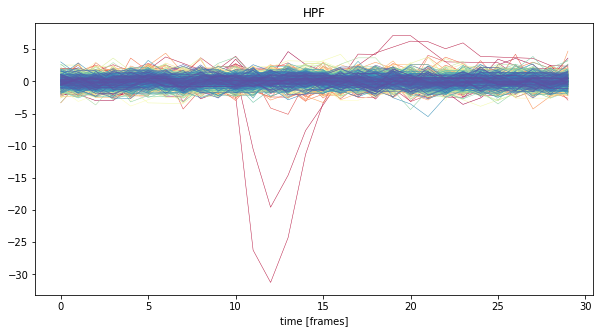

In [12]:
for name,bpf in bpfs.items():
    filtered = assay.filterProccessing(bpf,assay.data_raw_m, False)
    assay.disp_data(filtered,frange=np.s_[1610:1640],title=name)